In [1]:
#import essential libraries
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import numpy as np

In [2]:
# Function to display images side by side
def show_images(original, enhanced, title1="Original", title2="Enhanced"):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis("off")
    plt.show()

In [3]:
# Load underwater image
img = cv2.imread("underwater.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check filename!")

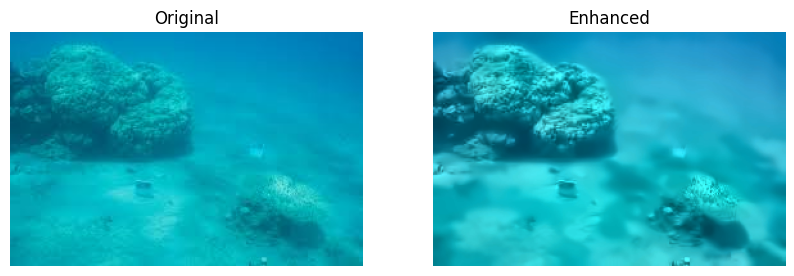

True

In [4]:
def adjust_gamma(image, gamma=1.2):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Step 1: Restore lost red channel
b, g, r = cv2.split(img)
r_boost = cv2.addWeighted(r, 1.5, b, -0.5, 0)
balanced = cv2.merge((b, g, r_boost))

# Step 2: CLAHE on L channel
lab = cv2.cvtColor(balanced, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)
lab_clahe = cv2.merge((l_clahe, a, b))
enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

# Step 3: Gamma correction (adjust brightness)
gamma_corrected = adjust_gamma(enhanced, gamma=1.1)  # Try 1.0 - 1.4 range

# Step 4: Light denoising
final_result = cv2.fastNlMeansDenoisingColored(gamma_corrected, None, h=5, hColor=5, templateWindowSize=7, searchWindowSize=21)

# Show results
show_images(img, final_result)

cv2.imwrite("enhanced_output.jpg", enhanced)


In [5]:
#Evaluation Metrics (PSNR, SSIM)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
enhanced_gray = cv2.cvtColor(final_result, cv2.COLOR_BGR2GRAY)

psnr_value = psnr(img_gray, enhanced_gray)
ssim_value = ssim(img_gray, enhanced_gray)

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.3f}")

PSNR: 22.34
SSIM: 0.857
